In [3]:
!pip install transformers

In [1]:
!pip install torch torchvision ftfy regex
!pip install git+https://github.com/openai/CLIP.git

  Obtaining dependency information for ftfy from https://files.pythonhosted.org/packages/91/f8/dfa32d06cfcbdb76bc46e0f5d69c537de33f4cedb1a15cd4746ab45a6a26/ftfy-6.1.3-py3-none-any.whl.metadata
  Obtaining dependency information for wcwidth<0.3.0,>=0.2.12 from https://files.pythonhosted.org/packages/fd/84/fd2ba7aafacbad3c4201d395674fc6348826569da3c0937e75505ead3528/wcwidth-0.2.13-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/53.4 kB ? eta -:--:--
   ---------------------------------------- 53.4/53.4 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: wcwidth
    Found existing installation: wcwidth 0.2.5
    Uninstalling wcwidth-0.2.5:
      Successfully uninstalled wcwidth-0.2.5
  Cloning https://github.com/openai/CLIP.git to c:\users\76392\appdata\local\temp\pip-req-build-im9z22vk
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished

  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git 'C:\Users\76392\AppData\Local\Temp\pip-req-build-im9z22vk'


In [4]:
from transformers import CLIPModel, CLIPProcessor

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [5]:
noun_labels = []

with open(r'D:\YeqinHUANG_Collection\ucl\wordsequence.txt', 'r', encoding='utf-8') as file:
    for line in file:
        noun_labels.append(line.strip())

print(noun_labels[:10])

['ATM', 'CD', 'SUV', 'TV', 'aardvark', 'abacus', 'abbey', 'abbreviation', 'abdomen', 'ability']


In [4]:
import os
from PIL import Image
import torch
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

folder_path = r"D:\YeqinHUANG_Collection\ucl\week14_28.Jan.2024\06text\image"

with open(r'D:\YeqinHUANG_Collection\ucl\wordsequence.txt', 'r', encoding='utf-8') as text_file:
    text_library = [line.strip() for line in text_file]

# 预处理文本并获取它们的嵌入
text_inputs = processor(text=text_library, return_tensors="pt", padding=True, truncation=True)
with torch.no_grad():
    text_embeddings = model.get_text_features(**text_inputs)

results = []

for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        print(f"Processing image: {filename}")

        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path).convert("RGB")

        # 预处理图片并获取嵌入
        image_inputs = processor(images=image, return_tensors="pt", padding=True)
        with torch.no_grad():
            image_embedding = model.get_image_features(**image_inputs)

        similarities = torch.nn.functional.cosine_similarity(text_embeddings, image_embedding)

        max_similarity, best_match_idx = torch.max(similarities, dim=0)
        best_match_text = text_library[best_match_idx]

        results.append({
            "filename": filename,
            "best_match_text": best_match_text,
            "similarity_score": max_similarity.item()
        })

for result in results:
    print(result)


Processing image: 152.jpg
Processing image: 1772576fe9caf4b03ec2476f2d1243f9.jpg
Processing image: 269.jpg
Processing image: 2f9823bfe99f3f004452b2c016a41c67.jpg
Processing image: 66c9dd625596bc843184f6ea8238d215.jpg
Processing image: 6ad0ec1cb20768b321b4d1c6fac5b4b6.jpg
{'filename': '152.jpg', 'best_match_text': 'blade', 'similarity_score': 0.28298935294151306}
{'filename': '1772576fe9caf4b03ec2476f2d1243f9.jpg', 'best_match_text': 'penguin', 'similarity_score': 0.2942986786365509}
{'filename': '269.jpg', 'best_match_text': 'award', 'similarity_score': 0.2952180504798889}
{'filename': '2f9823bfe99f3f004452b2c016a41c67.jpg', 'best_match_text': 'cover', 'similarity_score': 0.2563335597515106}
{'filename': '66c9dd625596bc843184f6ea8238d215.jpg', 'best_match_text': 'television', 'similarity_score': 0.2744302451610565}
{'filename': '6ad0ec1cb20768b321b4d1c6fac5b4b6.jpg', 'best_match_text': 'shawl', 'similarity_score': 0.30037882924079895}


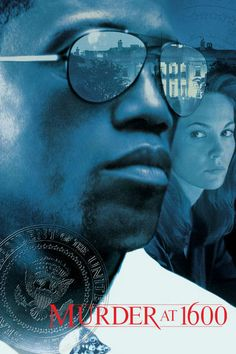

Image File: 152.jpg
Best Match Tag: blade
Similarity Score: 0.28298935294151306



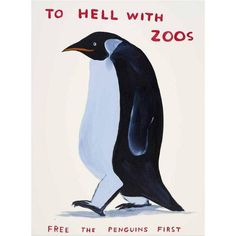

Image File: 1772576fe9caf4b03ec2476f2d1243f9.jpg
Best Match Tag: penguin
Similarity Score: 0.2942986786365509



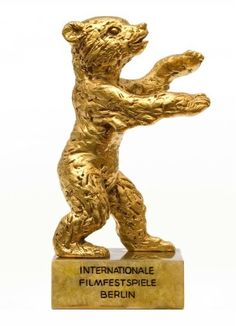

Image File: 269.jpg
Best Match Tag: award
Similarity Score: 0.2952180504798889



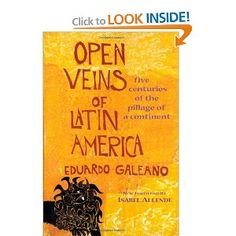

Image File: 2f9823bfe99f3f004452b2c016a41c67.jpg
Best Match Tag: cover
Similarity Score: 0.2563335597515106



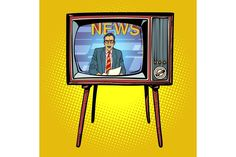

Image File: 66c9dd625596bc843184f6ea8238d215.jpg
Best Match Tag: television
Similarity Score: 0.2744302451610565



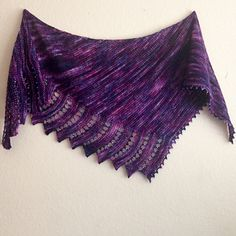

Image File: 6ad0ec1cb20768b321b4d1c6fac5b4b6.jpg
Best Match Tag: shawl
Similarity Score: 0.30037882924079895



In [5]:
from IPython.display import Image, display

for result in results:
    image_path = os.path.join(folder_path, result["filename"])
    display(Image(filename=image_path))
    
    print(f"Image File: {result['filename']}")
    print(f"Best Match Tag: {result['best_match_text']}")
    print(f"Similarity Score: {result['similarity_score']}\n")
